# Homework 5

## 1. Data

First, since the dataset is really large, we try to read just some of the rows to see which are the columns and how the information are stored. In this way we will know which columns are necessary to take for the ceration of the Citation Graph and Collaboration Graph.

In [1]:
import ijson
import pandas as pd

#Initializing an empty list to store data
data_short = []

#Opening the JSON file for reading in binary mode
with open(r"dblp.v12.json", "rb") as file:
    #Using ijson library to parse JSON items from the file
    objects = ijson.items(file, "item")

    #Iterating over the items in the JSON file
    for i, obj in enumerate(objects):
        #Break the loop after processing 1000 items (change as needed)
        if i == 1000:
           break

        #Appending the current JSON item to the data list
        data_short.append(obj)

df_short = pd.DataFrame(data_short)

Now we visualize the riducted dataset.

In [2]:
df_short

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89,93,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': 0...",{'raw': 'International Conference on Human-Com...
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,,,Journal,,56,,,NaN,NaN,"[{'name': 'Graph', 'w': 0.0}, {'name': 'Discre...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't..."
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137,144,Conference,Eurographics Association,,,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': 0.40216}, {'name': 'E...",{'raw': 'International Conference on Virtual R...
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597,602,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99,102,Conference,,,,,NaN,NaN,"[{'name': 'Computer vision', 'w': 0.44692}, {'...",{'raw': 'International Conference on Computer ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,875054,"[{'name': 'Maazen Alsabaan', 'org': 'Universit...",Geocast Routing in Vehicular Networks for Redu...,2011,7,26,40,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-23447-7_4,"[2101963262, 2136758263, 2144113407, 216268564...","{'IndexLength': 201, 'InvertedIndex': {'been':...","[{'name': 'Global warming', 'w': 0.4402}, {'na...",{'raw': 'International Conference on Informati...
996,875060,"[{'name': 'Frank Wolter', 'org': 'Institut für...",Spatial reasoning in RCC-8 with Boolean region...,2000,53,244,248,Conference,IOS Press,,,,"[852874, 1525985171, 1551609000, 1568262744, 1...","{'IndexLength': 90, 'InvertedIndex': {'but': [...","[{'name': 'Spatial intelligence', 'w': 0.49212...",{'raw': 'European Conference on Artificial Int...
997,876431,"[{'name': 'Apostolos P. Fournaris', 'org': 'Un...",Trust Management Through Hardware Means: Desig...,2011,7,31,45,Conference,"Springer, Dordrecht",,,10.1007/978-94-007-1488-5_3,"[118467740, 1730333074, 1881737672, 1969042806...","{'IndexLength': 210, 'InvertedIndex': {'very':...","[{'name': 'Trusted third party', 'w': 0.53136}...",{'raw': 'IEEE Computer Society Annual Symposiu...
998,876610,"[{'name': 'Hans H. K. Andersen', 'id': 2132304...",Evaluation of an e-commerce Agent.,2002,0,64,70,Conference,,,,,NaN,NaN,"[{'name': 'Commerce', 'w': 0.39993}, {'name': ...",{'raw': 'International Conference on Artificia...


As we can see we have 16 columns and we are interested in particular in: "id", "authors", "n_citation" and "references". Since the file is really large, we take just some of the columns and we also add the following columns to have complete information: "title", "doc_type" and "doi".

In [ ]:
import ijson
import pandas as pd
import numpy as np


#Path of the file
json_file_path = r"dblp.v12.json"

#Initializing the DATA variable
DATA = [] 
with open(json_file_path, "rb") as file:
    objects = ijson.items(file, "item")
    for i, element in enumerate(objects):
        data = {}

        #Extracting 'id' from the element
        data['id'] = element['id']

        #Extracting 'authors' from the element
        authors = element.get('authors', {})
        data['authors'] = authors


        #Extracting 'title' from the element
        data['title'] = element['title']

        #Extracting 'year' from the element or set to NaN if not present
        year = element.get('year')
        data['year'] = year if year else np.nan

        #Extracting 'n_citation' from the element or set to 0 if not present
        n_citation = element.get('n_citation')
        data['n_citation'] = element['n_citation'] if n_citation else 0

        #Extracting 'doc_type' from the element or set to NaN if not present
        doc_type = element.get('doc_type')
        data['doc_type']= element['doc_type'] if doc_type else np.nan

        #Extracting 'references' from the element, join them with ';' if present, or set to NaN if not present
        references = element.get('references')
        data['references'] = ';'.join([str(int(r)) for r in references]) if references else np.nan
        
        #Appending the extracted data to the DATA list
        DATA.append(data)

#Creating the dataframe
df = pd.DataFrame(DATA)


Now we visualize the dataset.

In [2]:
df

,id,authors,title,year,n_citation,doc_type,references,doi
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215,https://doi.org/10.1007/978-3-642-39476-8_19
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000.0,1,Journal,NaN,NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...,https://doi.org/10.2312/VAST/VAST11/137-144
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104,https://doi.org/10.1007/978-3-642-11164-8_97
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,0,Conference,NaN,NaN
...,...,...,...,...,...,...,...,...
4894076,99905544,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",A Naïve-Bayesian methodology to classify echo ...,2010.0,2,Conference,1562217771;1625504505;2015022770;2108751703;21...,https://doi.org/10.1007/978-3-642-24788-0_15
4894077,99884553,"[{'name': 'Koen Cornelis Hubertus Blom', 'org'...",Blind Equalization for underwater communications,2014.0,0,NaN,NaN,https://doi.org/10.3990/1.9789036536806
4894078,999847014,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",Technical Implementation and Feasibility,2015.0,1,NaN,1940933138;1975620021;1978183200;2097595927;21...,https://doi.org/10.1007/978-3-319-14439-9_9
4894079,9990887,"[{'name': 'Rajesh Natarajan', 'org': 'Indian I...",Knowledge Patterns in Databases,2011.0,0,NaN,NaN,https://doi.org/10.4018/978-1-59904-931-1.ch081


We can see that there are a lot of NaNs, so we delete the NaNs from the columns 'id', 'authors', 'references'.

In [35]:
#Eliminating NaNs values
df = df.dropna(subset=['id'])
df = df.dropna(subset=['authors'])
df = df.dropna(subset=['references'])

#Eliminating the duplicates from the column 'id'
df = df.drop_duplicates(subset=['id'])

In [36]:
#Visualizing the new dataset
df

,id,authors,title,year,n_citation,doc_type,references,doi
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215,https://doi.org/10.1007/978-3-642-39476-8_19
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...,https://doi.org/10.2312/VAST/VAST11/137-144
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104,https://doi.org/10.1007/978-3-642-11164-8_97
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484,https://doi.org/10.1007/978-1-4471-2155-8_42
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...,https://doi.org/10.1007/978-3-642-28490-8_52
...,...,...,...,...,...,...,...,...
4894073,999545449,"[{'name': 'Zaiwu Gong', 'org': 'School of Econ...",Consensus modeling with nonlinear utility and ...,2015.0,18,Journal,97170299;1848568749;1969696992;1972529917;1973...,https://doi.org/10.1016/j.knosys.2015.07.031
4894075,998513720,"[{'name': 'Jian Yu', 'id': 2517449035}]",Communication: Words and Conceptual Systems.,2015.0,0,Repository,2124479173;2242142378;2912565176,NaN
4894076,99905544,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",A Naïve-Bayesian methodology to classify echo ...,2010.0,2,Conference,1562217771;1625504505;2015022770;2108751703;21...,https://doi.org/10.1007/978-3-642-24788-0_15
4894078,999847014,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",Technical Implementation and Feasibility,2015.0,1,NaN,1940933138;1975620021;1978183200;2097595927;21...,https://doi.org/10.1007/978-3-319-14439-9_9


We now store the new dataframe in a csv file to simplify future reading of the dataset

In [6]:
df.to_csv('df_csv.csv', index=False)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Read the CSV file into a DataFrame
df = pd.read_csv('df_csv.csv')

In [2]:
df.head()

,id,authors,title,year,n_citation,doc_type,references
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215
1,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...
2,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104
3,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484
4,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...


Now we sort the dataset based on the number of citation to select the top 10000 papers with the highest number of citations.

In [3]:
import ast

#Sorting the DataFrame based on the number of citations in descending order
df_sorted = df.sort_values(by='n_citation', ascending=False)

#Selecting the top 10,000 papers from the sorted DataFrame
sub_df = df_sorted.head(10000)

# Transforn the value of column 'authors' into a list of dictionaries
sub_df['authors'] = sub_df['authors'].apply(ast.literal_eval) 

In [4]:
#Visualizing the selected dataset
sub_df.head()

,id,authors,title,year,n_citation,doc_type,references
2446184,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004.0,35541,Journal,19720318;1541642243;1560959218;1676552347;1681...
3298201,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001.0,34741,NaN,1507255258;1580948147;1605688901;1975846642;20...
2225037,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011.0,31047,Journal,1510526001;1543810117;1556115774;1568793342;16...
502478,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989.0,25855,Journal,157213131;1520103841;1778357938;1972888601;197...
1880225,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995.0,22276,Journal,2087347434;2154579312;2168228682


We can create the Citation Graph following the task: considering the reduced dataset of the top 10000 papers that we call `sub_df`, the nodes are the papers of this dataset and the edges are the citations of it.
This graph is direct and unweighted.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

#Initializing a directed Multigraph
citation_graph = nx.DiGraph()

#Creating a set of IDs from our new DataFrame
df_ids_set = set(sub_df['id'])

# Adding nodes to the graph based on the set of ids
for node_id in df_ids_set:
    citation_graph.add_node(int(node_id))

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df) and add edges
for index, paper in sub_df.iterrows():
    #Splitting references and remove leading/trailing whitespaces
    if pd.notna(paper['references']):
        references = paper['references'].split(';')
        references = [int(ref.strip()) for ref in references if ref] # create a list of int corrisponding to the paper ids referenced by the current paper

        # Add the edge between current node and referenced nodes only if the referenced node is contained in our subset of the original dataframe
        citation_graph.add_edges_from([(paper['id'], ref) for ref in references if ref in df_ids_set])


The other type of graph is the Collaboration Graph. Here, the nodes are the authors and the edges are the collaborations between the authors of the top 10000 papers.
Since the column 'authors' is composed by a dictionaries with general information about the authors, we create a function that takes just the name of the author.

In [6]:
def extract_authors(authors_list):
    #Extracting author names from a list of author information
    author_names = []
    for author_info in authors_list:
        if 'name' in author_info:
            author_names.append(author_info['name'])
    return author_names


In [7]:
#Applying the extraction function to authors in the extracted DataFrame
sub_df['author_names'] = sub_df['authors'].apply(extract_authors)

In [8]:
sub_df['author_names'].head(10)

2446184                                  [David G. Lowe]
3298201                                    [Leo Breiman]
2225037                 [Chih-Chung Chang, Chih-Jen Lin]
502478                                   [Fred D. Davis]
1880225                [Corinna Cortes, Vladimir Vapnik]
1712348                        [Heng Li, Richard Durbin]
1944406    [K. Deb, A. Pratap, S. Agarwal, T. Meyarivan]
2147920          [Fredrik Ronquist, John P. Huelsenbeck]
2137581                                     [John Canny]
2310011                            [N. Dalal, B. Triggs]
Name: author_names, dtype: object

Now we can implement the Collaboration Graph.

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

#Creating an undirected and weighted graph
collaboration_graph = nx.Graph()

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df)
for index, paper in sub_df.iterrows():
    
    #Adding authors as nodes to the graph
    collaboration_graph.add_nodes_from(paper['author_names'])


    # Adding weighted edges between authors (all combinations)
    author_pairs = itertools.combinations(paper['author_names'], 2)  # generates combinations of size 2 without repetition
    
    for author1, author2 in author_pairs:

        if collaboration_graph.has_edge(author1, author2):
            # Adding weight if the edge already exists
            collaboration_graph[author1][author2]['weight'] += 1
            # Adding paper ID to the list of papers
            collaboration_graph[author1][author2]['papers'].append(paper['id'])
        else:
            # Creating a new edge with weight 1 and a list of paper IDs
            collaboration_graph.add_edge(author1, author2, weight=1, papers=[paper['id']])
    


## 2. Controlling system

### 2.1. Backend Implementation

#### Functionality 1 - Graph's features
This function should examine a graph and report on some of its features. The input and report that this function should produce are shown below.

Input:
- The graph
- The name of the graph

Output:
- The number of the nodes in the graph
- The number of the edges in the graph
- The graph density
- The graph degree distribution
- The average degree of the graph
- The graph hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the graph is dense or sparse

In [10]:
import networkx as nx
import numpy as np

def functionality_1(graph, graph_name):

    # Use assert to check if the graph name is "citations" or "collaborations"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"
    
    # compute the number of NODES 
    num_nodes = graph.number_of_nodes()

    # compute the number of EDGES
    num_edges = graph.number_of_edges()

    # compute the DENSITY of the graph (use networkx so we don't have to distinguish if the graph is directed or undirected)
    density = nx.density(graph)

    # compute the DEGREE DISTRIBUTION
    if graph_name == "collaboration_graph":
        degree_distribution = nx.degree_histogram(graph) # use the predefined method
        
    else: # the graph is directed
        in_degrees = dict(graph.in_degree()) # create a dictionary of nodes as keys and in-degree as values
        out_degrees = dict(graph.out_degree()) # create a dictionary of nodes as keys and out-degree as values

        # initialize two empty list to create the histograms
        indegree_distribution = np.zeros(max(in_degrees.values())+1)
        outdegree_distribution = np.zeros(max(out_degrees.values())+1)

        for degree in in_degrees.values():
            indegree_distribution[degree] += 1
        
        for degree in out_degrees.values():
            outdegree_distribution[degree] += 1
        
        degree_distribution = (indegree_distribution, outdegree_distribution)


    # compute the AVERAGE DEGREE
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    average_degree = sum(node_degrees.values()) / num_nodes # sum up all the degrees and divide by number of nodes

    # compute the GRAPH HUBS 
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    # calculate the 95th percentil of the degree distribution
    degree_values = list(node_degrees.values())
    percentile_95 = np.percentile(degree_values, 95)
    # find Hubs
    hubs = [node for node, degree in node_degrees.items() if degree > percentile_95]

    # compute wheter the graph is DENSE or SPARSE
    threshold = 0.5 # we use the following convention: if the density is less than the chosen threshold the graph is sparse, otherwise is dense
    if density <= threshold:
        sparse_or_dense = "sparse"
    else:
        sparse_or_dense = "dense"

    return(graph_name, num_nodes, num_edges, density, degree_distribution, average_degree, hubs, sparse_or_dense)

#### Functionality 2 - Nodes' contribution
Using this functionality, you will identify the papers/authors who have significantly contributed to this field of study. For this analysis, focusing solely on the number of citations for the paper or the number of collaborations of the authors can be misleading. You will examine this using various centrality measurements.

Input:
- The graph
- A node of the graph (paper/author)
- The name of the graph

Output:
The centrality of the node, calculated based on the following centrality measurements:
- Betweeness
- PageRank
- ClosenessCentrality
- DegreeCentrality

In [11]:
def functionality_2(graph, node, graph_name):

    # Use assert to check if the graph name is "citations" or "collaborations"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"

    # Use assert to check if the node is a node of the graph
    assert node in graph.nodes, f"The node {node} is not in the graph"

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)[node]

    # PageRank Centrality
    pagerank_centrality = nx.pagerank(graph)[node]

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)[node]

    # Degree Centrality
    degree_centrality = nx.degree_centrality(graph)[node]

    return (node, graph_name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality)

#### Functionality 3 - Shortest ordered walk

Input:
- The graph data
- A sequence of authors_a = [a_2, ..., a_{n-1}]
- Initial node a_1 and an end node a_n
- N: denoting the top authors whose data should be considered

Output:
- The shortest walk of collaborations you need to read to get from author a_1 to author a_n and the papers you need to cross to realize this walk.

Considerations: For this functionality, you must implement an algorithm that returns the shortest walk that goes from node a_j to a_n, which visits in order the nodes in a. The choice of a_j and a_n can be made randomly (or if it improves the performance of the algorithm, you can also define it in any other way)

Important Notes:
This algorithm should be run only on the collaboration graph.
The algorithm needs to handle the case that the graph is not connected. Thus, only some nodes in a are reachable from a_1. In such a scenario, it is enough to let the program give in the output the string "There is no such path."
Since we are dealing with walks, you can pass on the same node a_i more than once, but you must preserve order. It means you can go back to any author node any time you want, assuming that the order in which you visit the required nodes is still the same.
Once you completed your implementation, ask chatGPT for a different one leveraging another approach in solving the shortest path and prove whether this implementation is correct.

First we define a function to find the shortest path between two nodes in a graph using Breadth-First Search.

In [805]:
from collections import deque

def shortest_path_bfs(graph, start, end):
    if start == end:
        return [start]

    visited = set() # initialize a set to track visited nodes
    queue = deque([(start, [start])]) # queue to perform BFS

    while queue: # cycle untill the queue is not empty
        current, path = queue.popleft()

        if current in visited:
            continue # skip if the node has been visited

        visited.add(current) # otherwise add the node to the set of explored nodes

        for neighbor in graph.neighbors(current):
            if neighbor == end:
                return path + [neighbor] # found the shortest path

            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None # No path found

Implementation of functionality 3 exploiting the BFS function defined above:
- Handle the case in which start node or end node are not nodes of the graph
- Extrapolate the Top N influential authors of the graph according to their degrees and build a subgraph
- initialize a path so store the sequenze of explored nodes
- find the shortset path between start node and first node of the input sequenze
- find the shortest path between the nodes in the sequence, iteratively
- find the shortest path betweeb the last node in the sequenze and the end node
- find the papers to read (they are stored as attributes of the edges)
- return the complete path and the sequence of papers, or the message error in case we don't find the path

In [859]:
def functionality_3(graph, list_nodes, start, end, N):

    # Check if start node, end node and all the nodes in the list in input are in the graph
    assert start in graph.nodes, f"Error: Start node '{start}' not found in the graph."
    assert end in graph.nodes, f"Error: End node '{end}' not found in the graph."
    assert all(node in graph.nodes for node in list_nodes), "Error: Not all nodes in the input list are found in the graph."


    top_N_authors = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:N]
    top_N_nodes = [author[0] for author in top_N_authors]
    graph = collaboration_graph.subgraph(top_N_nodes)


    # Initialize the complete path with the path from the starting node to the first intermediate node 
    complete_path = shortest_path_bfs(graph, start, list_nodes[0])

    # Check if the path is valid
    if complete_path == None:
        return "There is no such path."  # Exit the function and return the message

    # Find the shortest path for each pair of consecutive nodes in the list
    for i in range(len(list_nodes) - 1):
        current_start = list_nodes[i]
        current_end = list_nodes[i + 1]

        # Find the shortest path between the current nodes
        current_path = shortest_path_bfs(graph, current_start, current_end)

        # Check if the path is valid
        if current_path == None:
            return "There is no such path."  # Exit the function and return the message

        # Add the current path to the complete path
        complete_path += current_path[1:]

    # Add the shortest path from the last intermediate node to the target node
    last_intermediate = list_nodes[-1]
    last_path = shortest_path_bfs(graph, last_intermediate, end)

    # Check if the path is valid
    if last_path == None:
        return "There is no such path." # Exit the function and return the message

    complete_path += last_path[1:]

    list_papers = list()  # Initialize a list for the 'papers' attributes 

    for i in range(len(complete_path) - 1):
        edge = collaboration_graph[complete_path[i]][complete_path[i+1]]
        papers_att = edge.get('papers')  # Get the 'papers' attribute of the current edge 

        # Add the attributes to the list only if they are not already present
        for paper in papers_att:
            list_papers.append(paper)

    # return the complete path og authors and the sequence of paper to read 
    return (complete_path, list_papers)

### 2.2. Frontend Implementation

#### Visualization 1 - Visualize graph features

In [860]:
# Create an empty DataFrame to store the informations
columns = ["Graph Name", "# Nodes", "# Edges", "Density", "Average Degree", "Type"]
table1 = pd.DataFrame(columns=columns)

# call the functionality1 to retrive the required informations
cit_name, cit_nodes, cit_edges, cit_density, cit_degree_distribution, cit_average_degree, cit_hubs, cit_type = functionality_1(citation_graph, "citation_graph")
col_name, col_nodes, col_edges, col_density, col_degree_distribution, col_average_degree, col_hubs, col_type = functionality_1(collaboration_graph, "collaboration_graph")

# fill the table 
table1 = table1.append({
    "Graph Name": cit_name,
    "# Nodes": cit_nodes,
    "# Edges": cit_edges,
    "Density": cit_density,
    "Average Degree": cit_average_degree,
    "Type": cit_type
}, ignore_index=True)

table1 = table1.append({
    "Graph Name": col_name,
    "# Nodes": col_nodes,
    "# Edges": col_edges,
    "Density": col_density,
    "Average Degree": col_average_degree,
    "Type": col_type
}, ignore_index=True)

# Set "Graph Name" as the index
table1.set_index("Graph Name", inplace=True)

table1


,# Nodes,# Edges,Density,Average Degree,Type
Graph Name,,,,,
citation_graph,10000,55189,0.000552,11.037800,sparse
collaboration_graph,23742,144827,0.000514,12.200067,sparse


In [810]:
# Create a new Dataframe
df_cit_hubs = pd.DataFrame(columns=['Citation Graph Hubs'])

# Fill the dataframe with graph's hubs
df_cit_hubs['Citation Graph Hubs'] = cit_hubs

# show dataframe
df_cit_hubs

,Citation Graph Hubs
0,2124087378
1,2130509920
2,2107080958
3,2121531691
4,2167898414
...,...
453,2155904486
454,2163605009
455,2101771805
456,2147253850


In [811]:
# Create a new Dataframe
df_col_hubs = pd.DataFrame(columns=['Collaboration Graph Hubs'])

# Fill the dataframe with graph's hubs
df_col_hubs['Collaboration Graph Hubs'] = col_hubs

# show dataframe
df_col_hubs

,Collaboration Graph Hubs
0,Richard Durbin
1,Andrew Y. Ng
2,Ilya Sutskever
3,Jeffrey Dean
4,Sanjay Ghemawat
...,...
1183,G. Soza
1184,R. Susomboon
1185,J.M. Waite
1186,A. Wimmer


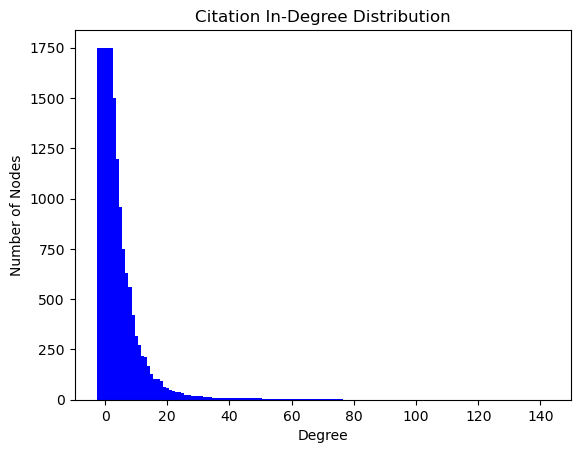

In [812]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[0])), cit_degree_distribution[0], width=5.0, color='b')
plt.title('Citation In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

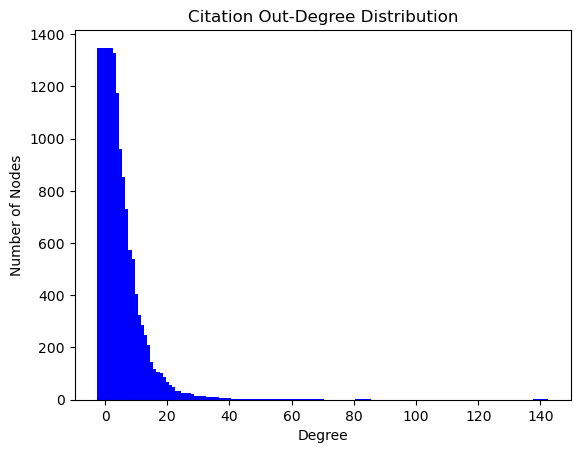

In [813]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[1])), cit_degree_distribution[1], width=5.0, color='b')
plt.title('Citation Out-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

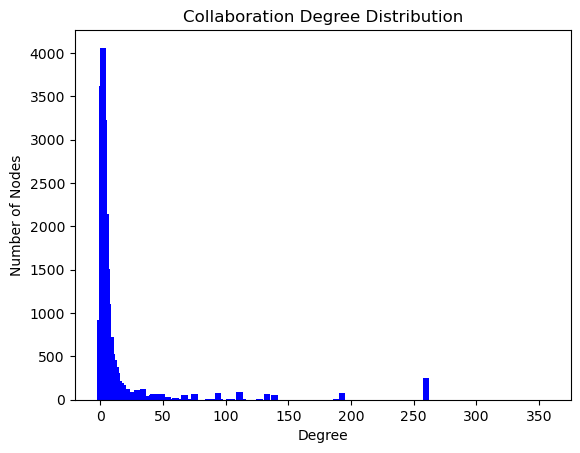

In [814]:
# Plot Degree Distribution
plt.bar(range(len(col_degree_distribution)), col_degree_distribution, width=5.0, color='b')
plt.title('Collaboration Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

#### Visualization 2 - Visualize the node's contribution

In [861]:
# Create an empty DataFrame to store the Centrality distances
columns = ["Node", "Graph Name", "Betweenness Centrality", "Pagerank Centrality", "Closeness Centrality", "Degree Centrality"]
table2 = pd.DataFrame(columns=columns)

# call the functionality1 to retrive the required informations
node, name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality = functionality_2(citation_graph, 2124087378, 'citation_graph')

# fill the table 
table2 = table2.append({
    "Node": node,
    "Graph Name": name,
    "Betweenness Centrality": betweenness_centrality,
    "Pagerank Centrality": pagerank_centrality,
    "Closeness Centrality": closeness_centrality,
    "Degree Centrality": degree_centrality,
}, ignore_index=True)

# Set "Node" as the index
table2.set_index("Node", inplace=True)
table2

,Graph Name,Betweenness Centrality,Pagerank Centrality,Closeness Centrality,Degree Centrality
Node,,,,,
2124087378,citation_graph,0.00023,0.000445,0.032208,0.0038


### Visualization 3 - Visualize the shortest-ordered route
- Print the papers needed to be crossed in the shortest walk in order
- Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)

IDEA: In order to simplify the visualization process, we decided to extract from the graph the first 1000 influential nodes according to their degree, and from this list randomly sample one node as the starting node, one node as the ending node, and a list of 15 nodes to define the sequence of nodes that MUST be visited in order during graph exploration.
The parameter N, defined in the functionality_3 signature, is used to extract a subgraph from the original one, but since we sample nodes randomly, if we use a subgraph it is possible that the extracted value cannot be found; although the function handles this case with asserts, we decided to work on the entire collaboration_graph, so N is set to the number of nodes in the original graph.

- Start Node: Siqian He
- End Node: C Lachaize
- Nodes to visit: ['L Arminski', 'Guillaume Desjardins', 'Andreas R. Pfenning', 'Angela Yen', 'Li Huei Tsai', 'P Gane', 'J. Rodney Brister', 'James Laudon', 'Amir Salek', 'Duygu Sarikaya', 'Ian Sillitoe', 'Winston Hide', 'Etienne Simon', 'Robert Passier', 'Yaping Liu'] 

Papers to cross in the shortest walk:
 [2177317049, 2165463056, 2188930066, 1964027278, 2121884932, 2157614013, 2062832101, 2164284397, 2114298221, 2162986857, 2165350939, 2163844889, 2124409123, 2145403270, 2155174176, 2739999456, 2605068739, 2772934464, 2739999456, 2605068739, 2772934464, 2155174176, 2163844889, 2116773335, 1501825524, 1864972570, 2036557187, 2112681514, 1516111018, 1528056001, 2949608212, 2384495648, 2384495648, 1895577753, 2951912364, 2525778437, 2076154138, 2076154138, 2076154138, 2076154138, 2108728387, 2145295623, 2161444669, 1516111018, 1528056001, 2112681514, 2036557187, 1864972570, 1501825524, 2116773335, 2163844889, 2155174176, 2739999456, 26050

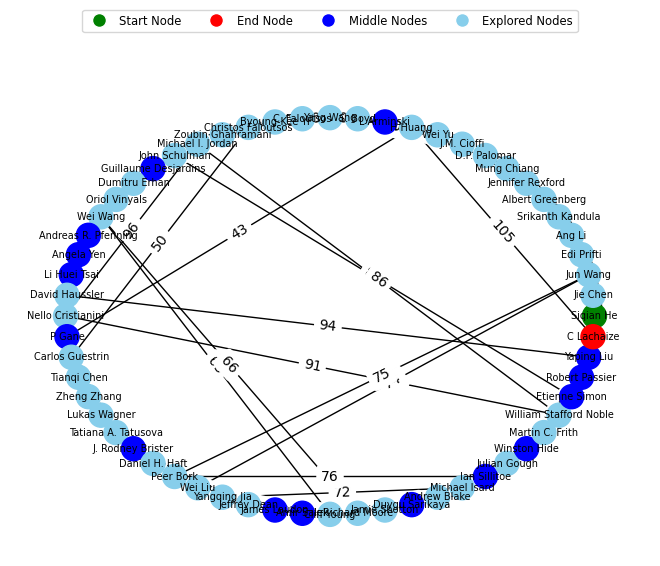

In [885]:
import random

# Find the N nodes with greater degree
N = 1000
top_N_nodes = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:N]
top_N_authors = [author[0] for author in top_N_nodes]

# initialize the start node randomly
initial_node = random.choice(top_N_authors)
print("- Start Node:",initial_node)

# initialize the end node randomly
end_node = random.choice(top_N_authors)
print("- End Node:",end_node)

# initialize the list of nodes to visit randomly
authors_sequence = random.sample(top_N_authors, 15)
print("- Nodes to visit:", authors_sequence, "\n")


# Test the function with the sample data
result = functionality_3(collaboration_graph, authors_sequence, initial_node, end_node, nx.number_of_nodes(collaboration_graph)) # N = number of nodes of the graph

# Check if there is a path between initial and end nodes
if result == "There is no such path.": # if there is not a path, print the message
    print(result)

else: # if the path exists
    nodes_path, list_papers = result # extract the path of nodes and the sequenze of papers

    # print the sequence of papers as required
    print("Papers to cross in the shortest walk:\n",list_papers)

    # Create an empty undirected graph and fill it with the nodes in the path and relative edges
    graph = nx.Graph()
    for idx in range(len(nodes_path) - 1):
        graph.add_edge(nodes_path[idx], nodes_path[idx + 1])

    # define a layout for the graph plot
    pos = nx.circular_layout(graph)

    # Color nodes: green for start node, red for end node, blue for nodes to visit, skyblue for other nodes explored 
    node_colors = [
        'green' if node == initial_node else
        'red' if node == end_node else
        'blue' if node in authors_sequence else
        'skyblue' for node in graph.nodes
    ]   

    # Visualize the graph with sequential numbers on edges and colored nodes
    nx.draw(graph, pos=pos, with_labels=True, font_size=7, font_color='black', node_size=300, node_color=node_colors)
    
    # Annotate edges with sequential numbers to show the visiting order 
    edge_labels = {(nodes_path[idx], nodes_path[idx + 1]): idx + 1 for idx in range(len(nodes_path) - 1)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_color='black')

 
    # Create a legend in the plot 
    legend_labels = ['Start Node', 'End Node', 'Middle Nodes', 'Explored Nodes']
    legend_colors = ['green', 'red', 'blue', 'skyblue']  
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

    plt.show()

